# Import required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
from scipy import stats
import calendar
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')



# Step-by-Step EDA Plan:
## Setup and Data Loading

### Import libraries
### Load CSVs into pandas DataFrames

## Data Cleaning & Preprocessing

### Handle missing values
### Convert date columns
### Check for duplicates

## Basic Analysis & Visualization

### Customer demographics
#### Product categories analysis
### Transaction patterns


In [18]:
def load_data():
    """
    Load data from CSV files and convert date columns.
    """
    # Read CSVs
    customers_df = pd.read_csv("data/raw/Customers.csv")
    products_df = pd.read_csv("data/raw/Products.csv")
    transactions_df = pd.read_csv("data/raw/Transactions.csv")
    
    # Convert date columns
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    
    return customers_df, products_df, transactions_df

# Load data
customers_df, products_df, transactions_df = load_data()

In [20]:
#Basic info about datasets
print("\nCustomers Dataset Info:")
customers_df.info()
print("\nProducts Dataset Info:")
products_df.info()
print("\nTransactions Dataset Info:")
transactions_df.info()

# Check for missing values
print("\nMissing Values Summary:")
print("\nCustomers:")
print(customers_df.isnull().sum())
print("\nProducts:")
print(products_df.isnull().sum())
print("\nTransactions:")
print(transactions_df.isnull().sum())



Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100

In [21]:
#Customer Demographics Analysis
def analyze_customer_demographics(customers_df):
    """
    Analyze customer demographics including region distribution and signup trends.
    """
    # Region distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=customers_df, x='Region')
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)
    plt.show()
    
    # Signup trends over time
    plt.figure(figsize=(12, 6))
    customers_df['SignupDate'].dt.year.value_counts().sort_index().plot(kind='line')
    plt.title('Customer Signups Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.show()


In [22]:
#Product Analysis
def analyze_products(products_df, transactions_df):
    """
    Analyze product data including category distribution and price distribution.
    """
    # Category distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=products_df, x='Category')
    plt.title('Products by Category')
    plt.xticks(rotation=45)
    plt.show()
    
    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=products_df, x='Category', y='Price')
    plt.title('Price Distribution by Category')
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Transaction Pattern Analysis
def analyze_transactions(transactions_df):
    """
    Analyze transaction patterns including transaction value distribution and trends over time.
    """
    # Transaction value distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=transactions_df, x='TotalValue', bins=50)
    plt.title('Distribution of Transaction Values')
    plt.show()
    
    # Transaction trends over time
    daily_transactions = transactions_df.groupby('TransactionDate')['TransactionID'].count()
    plt.figure(figsize=(12, 6))
    daily_transactions.plot()
    plt.title('Daily Transaction Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()

In [32]:
#Advanced Customer Analysis
def advanced_customer_analysis(customers_df, transactions_df):
    """
    Analyze customer behavior and segmentation.
    """
    # Merge customer and transaction data
    customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID')
    
    # Customer Lifetime Value Analysis
    customer_ltv = customer_transactions.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'TransactionID': 'count'
    }).reset_index()
    
    customer_ltv.columns = ['CustomerID', 'TotalSpent', 'TransactionCount']
    customer_ltv['AverageTransactionValue'] = customer_ltv['TotalSpent'] / customer_ltv['TransactionCount']
    
    plt.figure(figsize=(15, 5))
    
    # Distribution of Customer Total Spend
    plt.subplot(1, 3, 1)
    sns.histplot(data=customer_ltv, x='TotalSpent', bins=30)
    plt.title('Distribution of Customer Total Spend')
    
    # Distribution of Transaction Frequency
    plt.subplot(1, 3, 2)
    sns.histplot(data=customer_ltv, x='TransactionCount', bins=30)
    plt.title('Distribution of Transaction Frequency')
    
    # Average Transaction Value vs Transaction Count
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=customer_ltv, x='TransactionCount', y='AverageTransactionValue')
    plt.title('Avg Transaction Value vs Frequency')

    # Plot Customer Lifetime Value Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=customer_ltv, x='TotalSpent', bins=50, kde=True)
    plt.title('Distribution of Customer Lifetime Value (CLV)')
    plt.xlabel('Total Spent')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.tight_layout()
    plt.show()

    
    return customer_ltv

In [26]:
# Seasonal Analysis
def seasonal_analysis(transactions_df):
    """
    Analyze seasonal patterns in sales.
    """
    transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
    transactions_df['DayOfWeek'] = transactions_df['TransactionDate'].dt.dayofweek
    
    # Monthly Analysis
    monthly_sales = transactions_df.groupby('Month').agg({
        'TotalValue': 'sum',
        'TransactionID': 'count'
    }).reset_index()
    
    monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_name[x])
    
    plt.figure(figsize=(15, 5))
    
    # Monthly Sales Value
    plt.subplot(1, 2, 1)
    sns.barplot(data=monthly_sales, x='Month', y='TotalValue')
    plt.title('Monthly Sales Value')
    plt.xticks(rotation=45)
    
    # Daily Sales Pattern
    plt.subplot(1, 2, 2)
    daily_sales = transactions_df.groupby('DayOfWeek')['TotalValue'].mean().reset_index()
    daily_sales['DayOfWeek'] = daily_sales['DayOfWeek'].apply(lambda x: calendar.day_name[x])
    sns.barplot(data=daily_sales, x='DayOfWeek', y='TotalValue')
    plt.title('Average Daily Sales')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [27]:
#Product Performance Analysis
def product_performance_analysis(products_df, transactions_df):
    """
    Detailed analysis of product performance.
    """
    # Merge product and transaction data
    product_sales = pd.merge(transactions_df, products_df, on='ProductID')
    
    # Product Category Performance
    category_performance = product_sales.groupby('Category').agg({
        'TotalValue': ['sum', 'mean', 'count']
    }).reset_index()
    
    category_performance.columns = ['Category', 'TotalRevenue', 'AverageRevenue', 'SaleCount']
    
    plt.figure(figsize=(15, 5))
    
    # Category Revenue Share
    plt.subplot(1, 3, 1)
    plt.pie(category_performance['TotalRevenue'], labels=category_performance['Category'], autopct='%1.1f%%')
    plt.title('Revenue Share by Category')
    
    # Average Revenue per Category
    plt.subplot(1, 3, 2)
    sns.barplot(data=category_performance, x='Category', y='AverageRevenue')
    plt.title('Average Revenue per Category')
    plt.xticks(rotation=45)
    
    # Sales Count by Category
    plt.subplot(1, 3, 3)
    sns.barplot(data=category_performance, x='Category', y='SaleCount')
    plt.title('Sales Count by Category')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return category_performance

In [33]:
# RFM Analysis
def rfm_analysis(transactions_df):
    """
    Perform RFM (Recency, Frequency, Monetary) Analysis.
    """
    # Calculate Recency, Frequency, and Monetary metrics
    last_date = transactions_df['TransactionDate'].max()
    
    rfm = transactions_df.groupby('CustomerID').agg({
        'TransactionDate': lambda x: (last_date - x.max()).days,  # Recency
        'TransactionID': 'count',  # Frequency
        'TotalValue': 'sum'  # Monetary
    }).reset_index()
    
    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    
    # Score each metric
    rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5,4,3,2,1])
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=[1,2,3,4,5])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1,2,3,4,5])
    
    # Calculate RFM Score
    rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    
    plt.figure(figsize=(20, 10))  # Increase the size of the plot
    
    # Recency vs Monetary
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=rfm, x='Recency', y='Monetary')
    plt.title('Recency vs Monetary')
    
    # Frequency vs Monetary
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=rfm, x='Frequency', y='Monetary')
    plt.title('Frequency vs Monetary')
    
    # Distribution of RFM Scores
    plt.subplot(1, 3, 3)
    sns.histplot(data=rfm, x='RFM_Score')
    plt.title('Distribution of RFM Scores')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20, 10)) 
    
    plt.tight_layout()
    plt.show()
    
    return rfm

In [34]:
def Visualize():
    """
    Visualize function to run the EDA and analysis.
    """
    # Run the analyses
    analyze_customer_demographics(customers_df)
    analyze_products(products_df, transactions_df)
    analyze_transactions(transactions_df)
    
    # Run advanced analyses
    customer_ltv = advanced_customer_analysis(customers_df, transactions_df)
    seasonal_analysis(transactions_df)
    category_performance = product_performance_analysis(products_df, transactions_df)
    rfm_results = rfm_analysis(transactions_df)
    
    # Additional insights
    print("\nKey Statistics:")
    print(f"Total number of customers: {len(customers_df)}")
    print(f"Total number of products: {len(products_df)}")
    print(f"Total number of transactions: {len(transactions_df)}")
    print(f"\nAverage transaction value: ${transactions_df['TotalValue'].mean():.2f}")
    print(f"Most common product category: {products_df['Category'].mode()[0]}")
    
    # Print key insights
    print("\nKey Business Insights:")
    print("-" * 50)
    print(f"Average Customer Lifetime Value: ${customer_ltv['TotalSpent'].mean():.2f}")
    print(f"Most Valuable Category: {category_performance.iloc[category_performance['TotalRevenue'].argmax()]['Category']}")
    print(f"Average Transaction Frequency: {customer_ltv['TransactionCount'].mean():.2f} transactions per customer")
    
    # Top customers by RFM score
    print("\nTop Customer Segments (RFM Analysis):")
    print(rfm_results['RFM_Score'].value_counts().head())

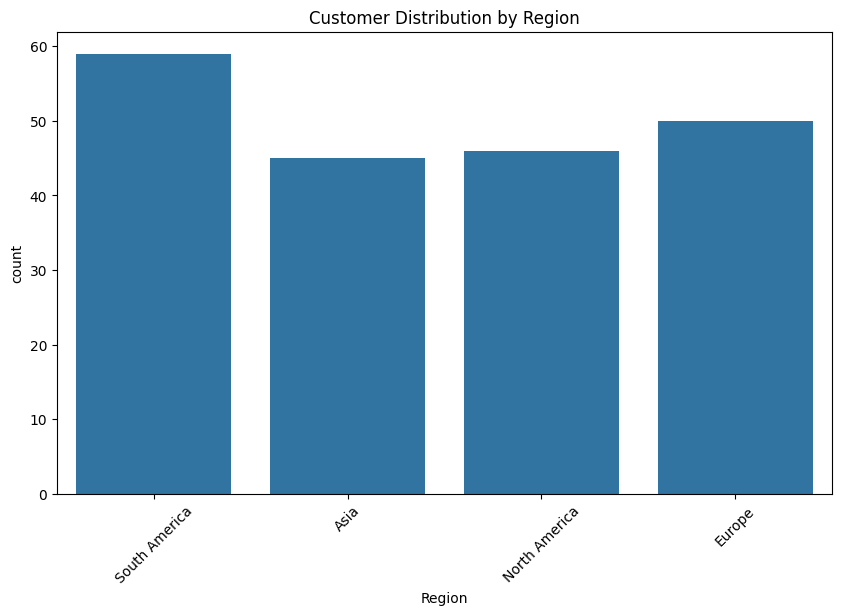

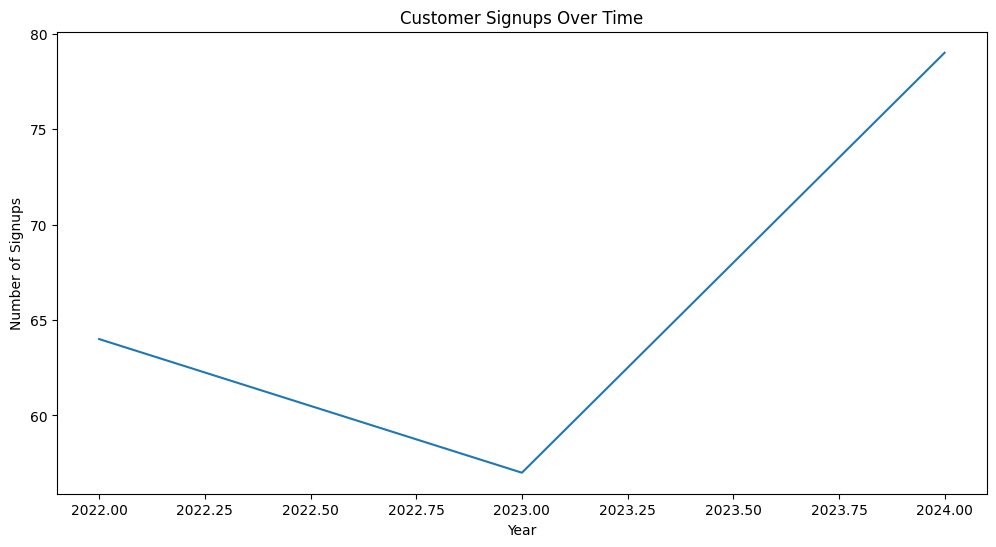

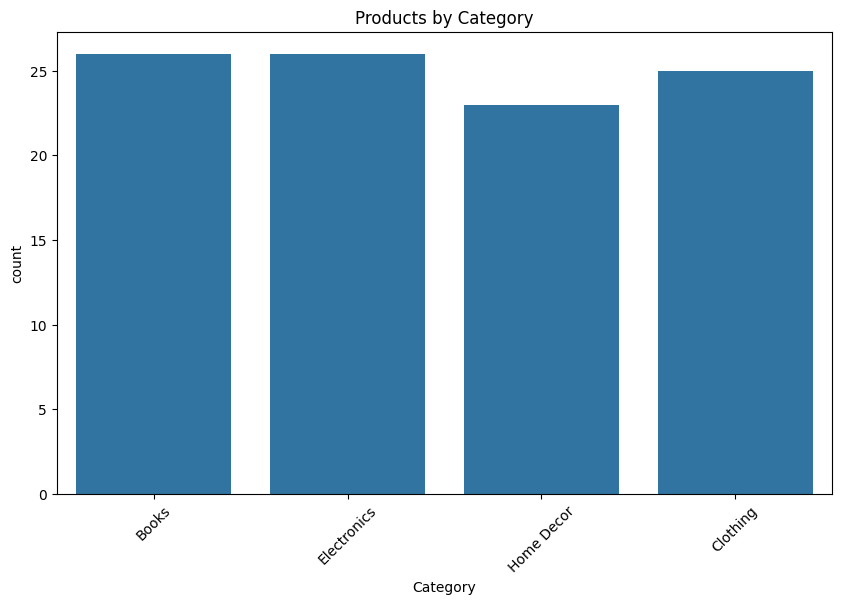

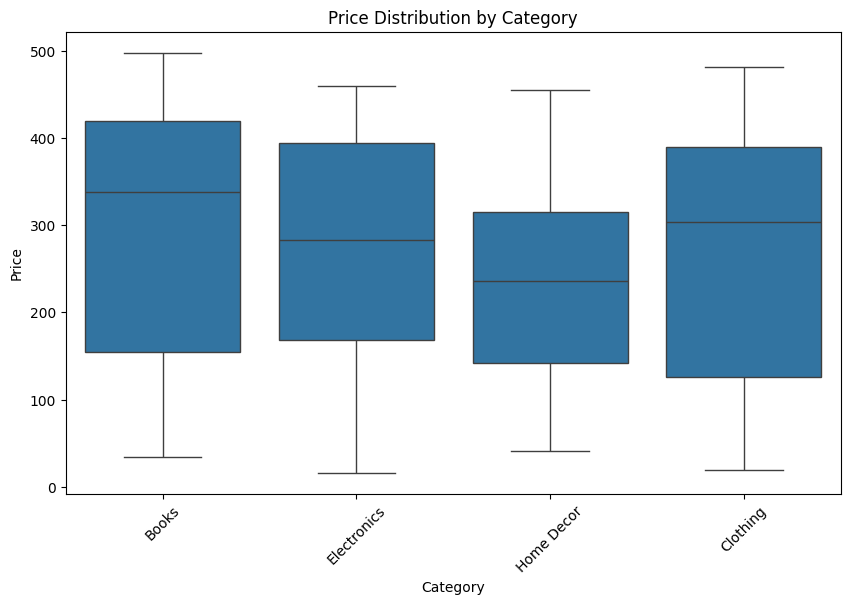

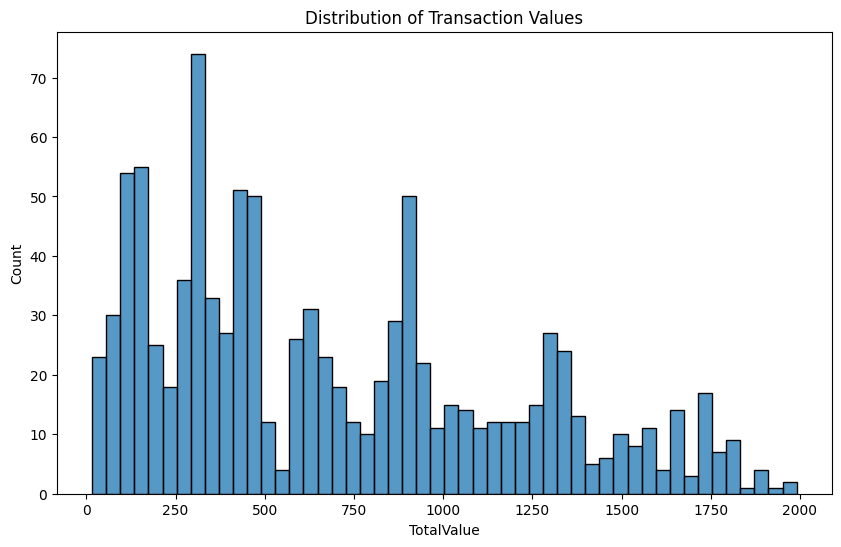

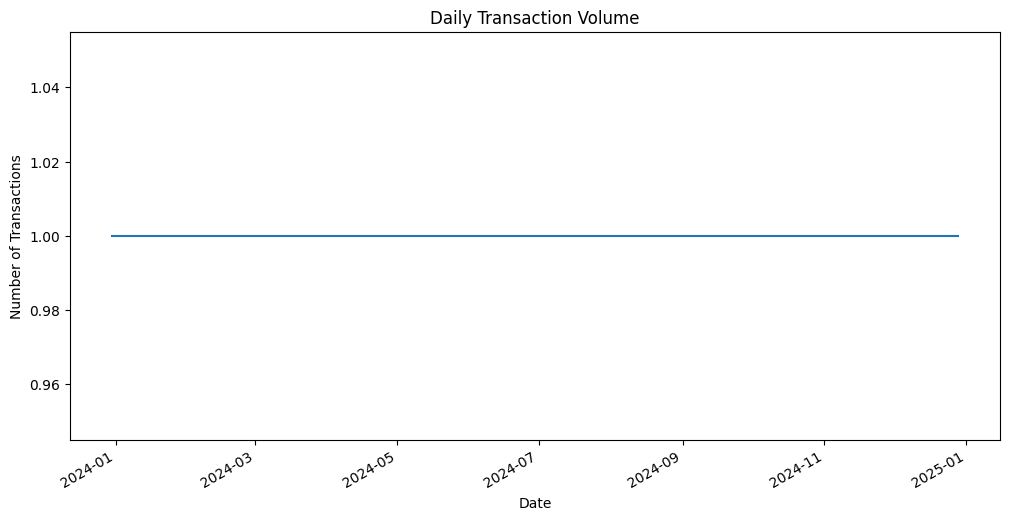

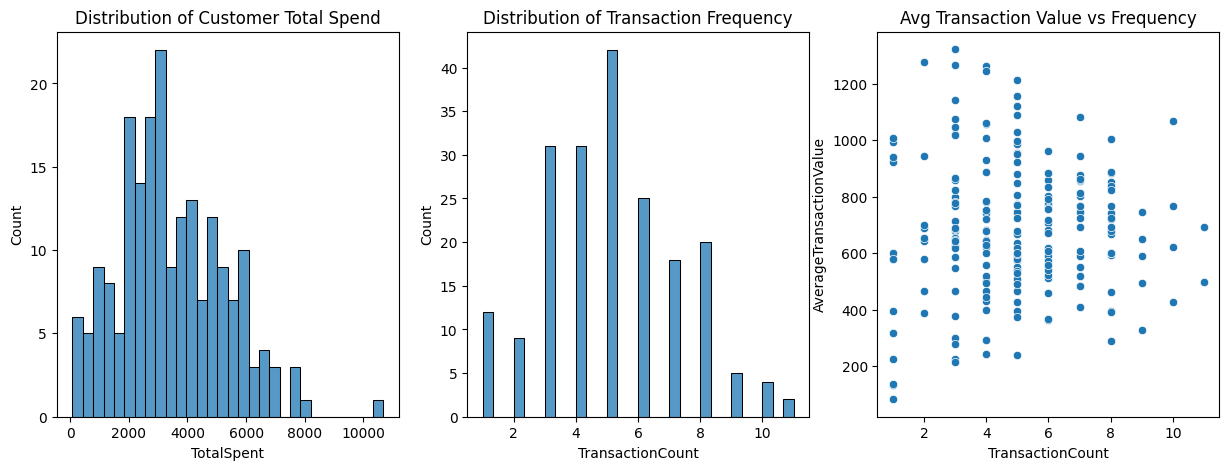

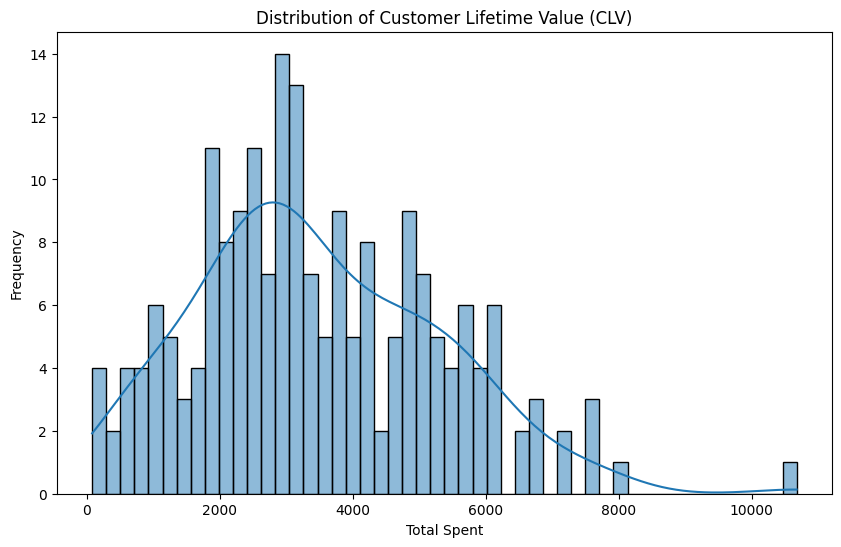

<Figure size 640x480 with 0 Axes>

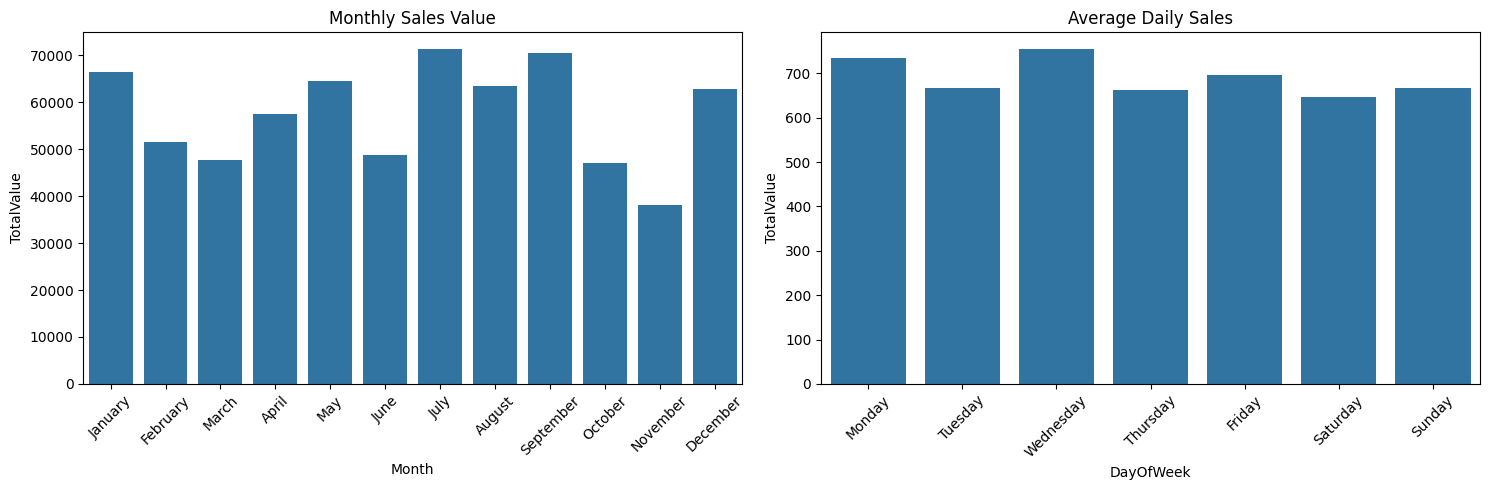

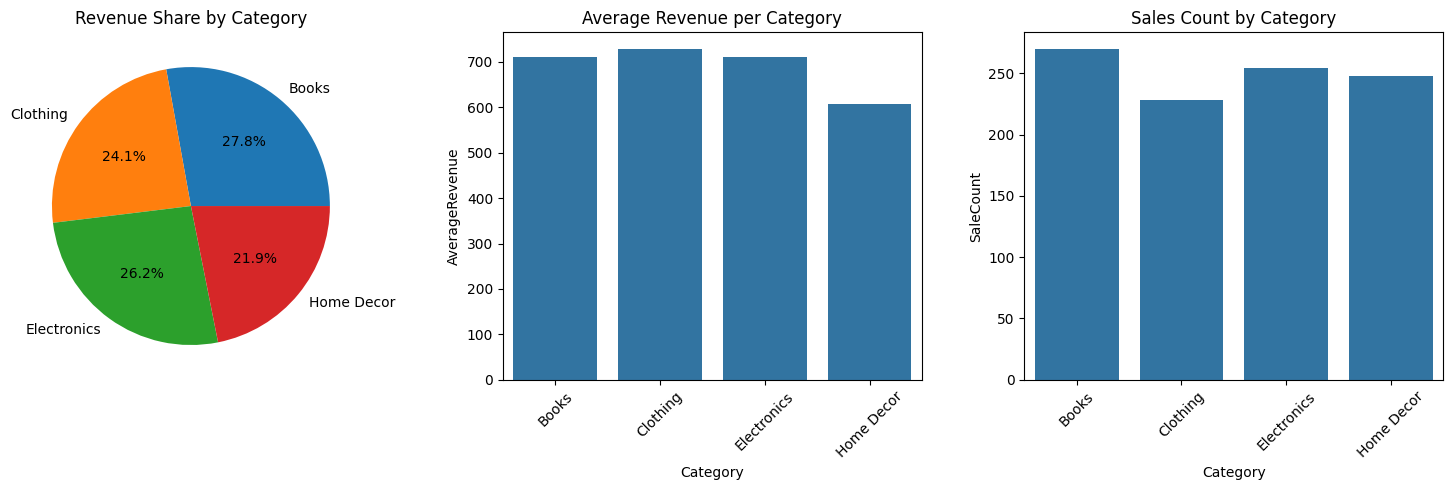

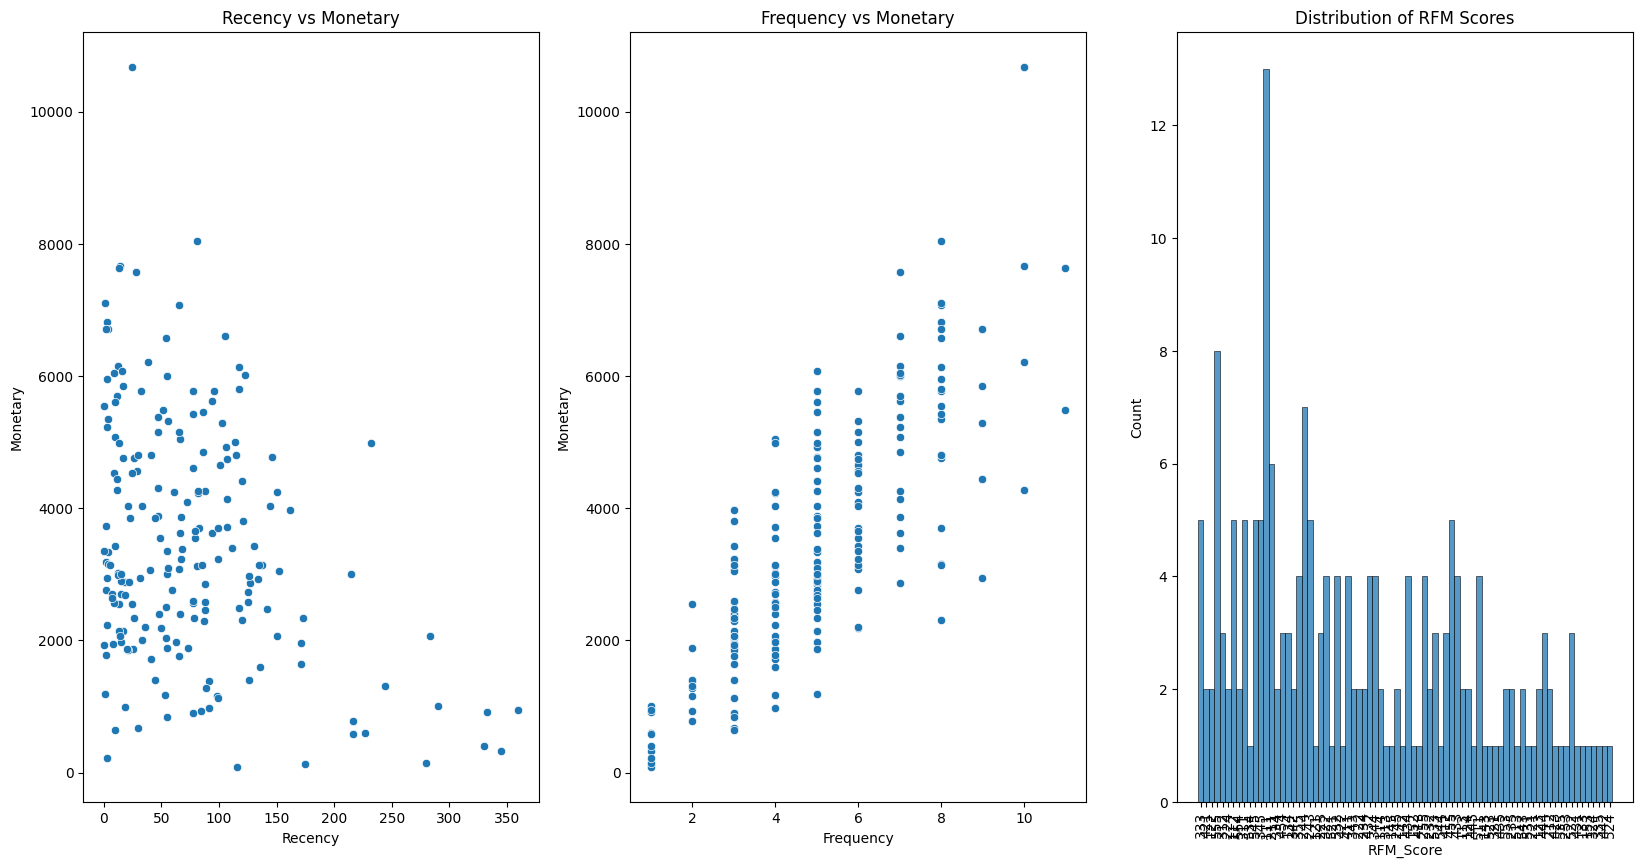

<Figure size 2000x1000 with 0 Axes>


Key Statistics:
Total number of customers: 200
Total number of products: 100
Total number of transactions: 1000

Average transaction value: $690.00
Most common product category: Books

Key Business Insights:
--------------------------------------------------
Average Customer Lifetime Value: $3467.31
Most Valuable Category: Books
Average Transaction Frequency: 5.03 transactions per customer

Top Customer Segments (RFM Analysis):
RFM_Score
111    13
555     8
244     7
211     6
333     5
Name: count, dtype: int64


In [35]:
Visualize()